# Employee Attrition Prediction Project – Refined Notebook
This notebook includes clear visualizations, data validation, preprocessing, and model evaluation.

In [336]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pickle
from imblearn.over_sampling import SMOTE

# Set Seaborn style
sns.set(style='whitegrid')

In [338]:
# Load Dataset
data = pd.read_csv('IBM Project Data.csv')
print("Data Shape")
print("Rows : ",data.shape[0])
print("Columns : ",data.shape[1])

Data Shape
Rows :  60000
Columns :  35


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       59994 non-null  float64
 1   Attrition                 60000 non-null  object 
 2   BusinessTravel            59989 non-null  object 
 3   DailyRate                 59997 non-null  float64
 4   Department                59993 non-null  object 
 5   DistanceFromHome          59994 non-null  float64
 6   Education                 59994 non-null  float64
 7   EducationField            59995 non-null  object 
 8   EmployeeCount             59989 non-null  float64
 9   EmployeeNumber            59987 non-null  float64
 10  EnvironmentSatisfaction   59984 non-null  float64
 11  Gender                    59991 non-null  object 
 12  HourlyRate                59994 non-null  float64
 13  JobInvolvement            59983 non-null  float64
 14  JobLev

In [340]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,59994.00,59997.00,59994.00,59994.00,59989.00,59987.00,59984.00,59994.00,59983.00,59982.00,...,59992.00,59988.00,59996.00,59984.00,59986.00,59984.00,59997.00,59986.00,59985.00,59991.00
mean,36.67,798.23,9.50,2.92,1.00,1032.77,2.70,66.04,2.72,2.03,...,2.70,80.00,0.77,11.04,2.78,2.75,6.95,4.15,2.19,4.03
std,9.85,413.67,11.37,1.02,0.00,597.96,1.10,21.07,0.71,1.10,...,1.08,0.00,0.85,7.90,1.30,0.72,6.35,3.68,3.26,3.60
min,18.00,83.00,1.00,1.00,1.00,1.00,1.00,21.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,450.00,2.00,2.00,1.00,507.00,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,35.00,778.00,7.00,3.00,1.00,1033.00,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,9.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1152.00,14.00,4.00,1.00,1556.00,4.00,83.00,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,116.00,1848.00,485.00,5.00,1.00,2068.00,4.00,126.00,4.00,5.00,...,4.00,80.00,3.00,48.00,7.00,4.00,65.00,21.00,18.00,20.00


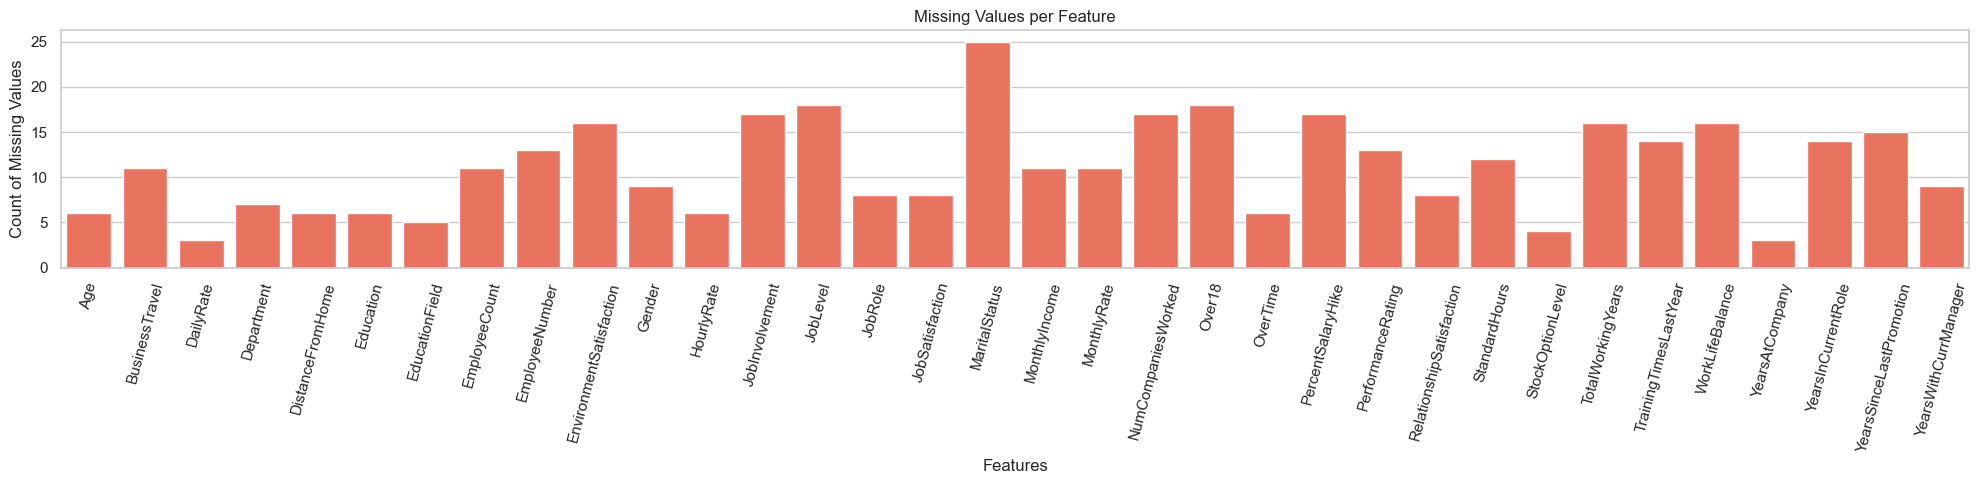

⚠️ Missing values found.


In [343]:
# Check for Missing Values
missing_series = data.isnull().sum()
missing = missing_series[missing_series > 0]

if missing.empty:
    print("✅ No missing values detected.")
else:
    plt.figure(figsize=(20, 5))
    sns.barplot(x=missing.index, y=missing.values, color='tomato')
    plt.title("Missing Values per Feature")
    plt.ylabel("Count of Missing Values")
    plt.xlabel("Features")
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()
    print("⚠️ Missing values found.")


In [345]:
# Encode Categorical Features for Visualization
categorical_cols = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [346]:
# Correlation with Attrition - Focused
corr = data.corr()
top_corr = corr['Attrition'].drop('Attrition').abs().sort_values(ascending=False).head(10)
print("Top Related Features to Attrition:")
for feature, value in top_corr.items():
    print(f"{feature}: {value:.2f}")

Top Related Features to Attrition:
OverTime: 0.27
MaritalStatus: 0.20
TotalWorkingYears: 0.19
YearsInCurrentRole: 0.18
JobLevel: 0.18
YearsWithCurrManager: 0.18
Age: 0.16
StockOptionLevel: 0.16
JobInvolvement: 0.14
YearsAtCompany: 0.14


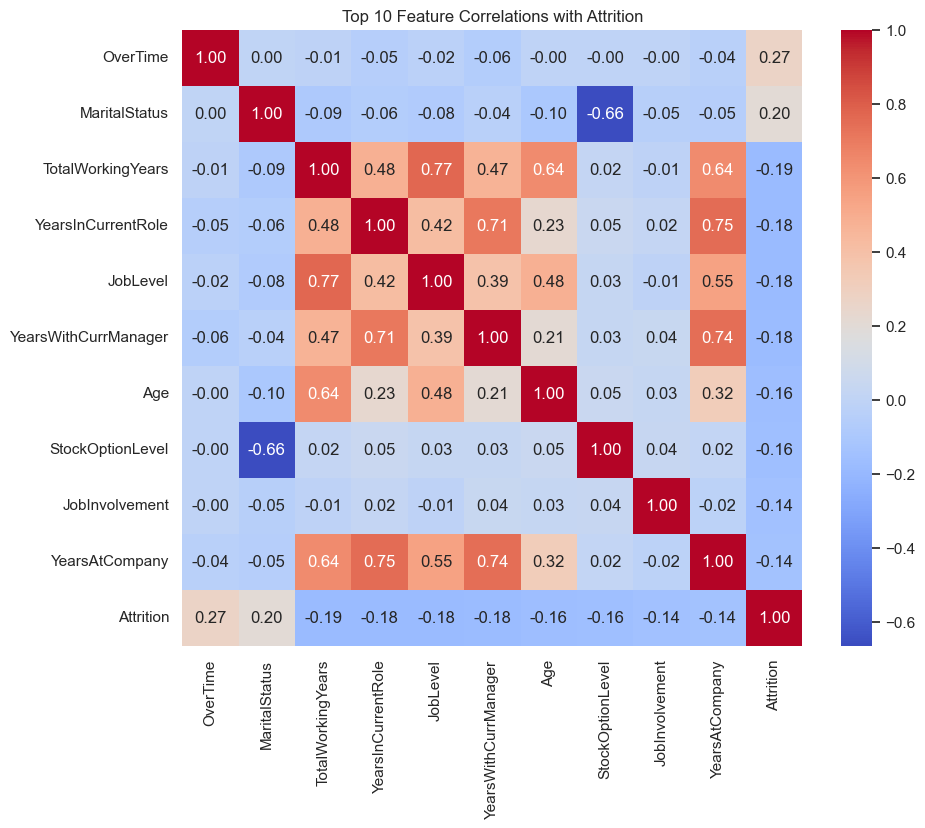

In [347]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[top_corr.index.tolist() + ['Attrition']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 10 Feature Correlations with Attrition")
plt.show()

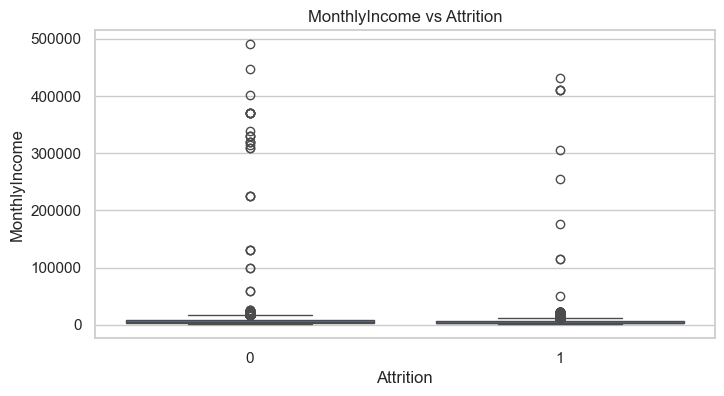

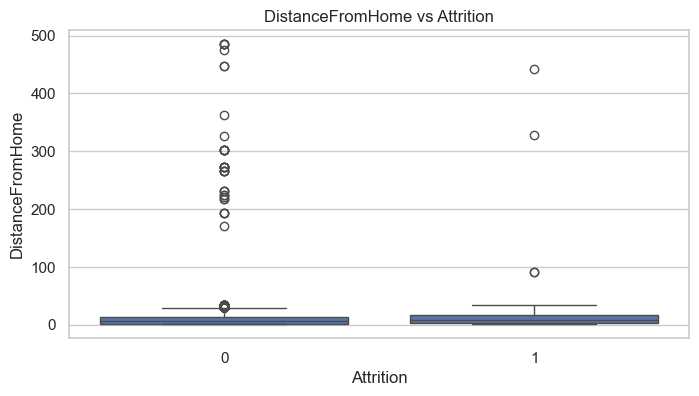

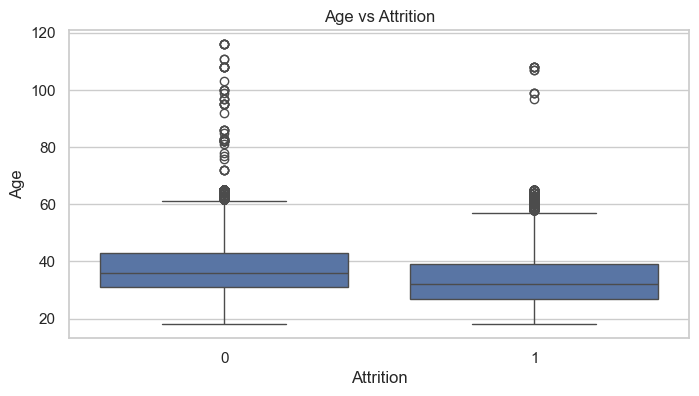

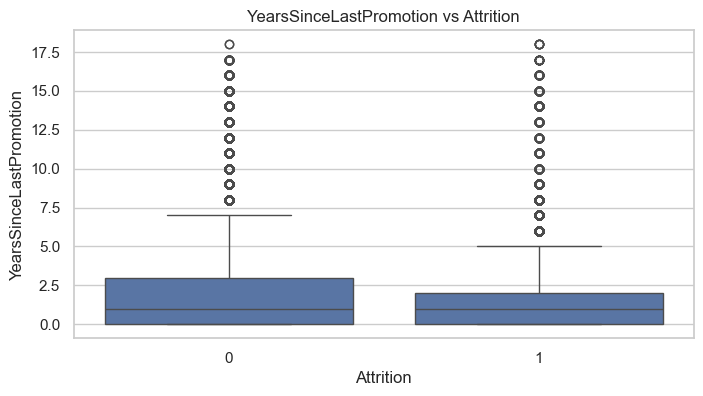

In [348]:
# Visualize Key Numeric Features vs Attrition
key_numeric = ['MonthlyIncome', 'DistanceFromHome', 'Age', 'YearsSinceLastPromotion']
for feature in key_numeric:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Attrition', y=feature, data=data)
    plt.title(f"{feature} vs Attrition")
    plt.show()

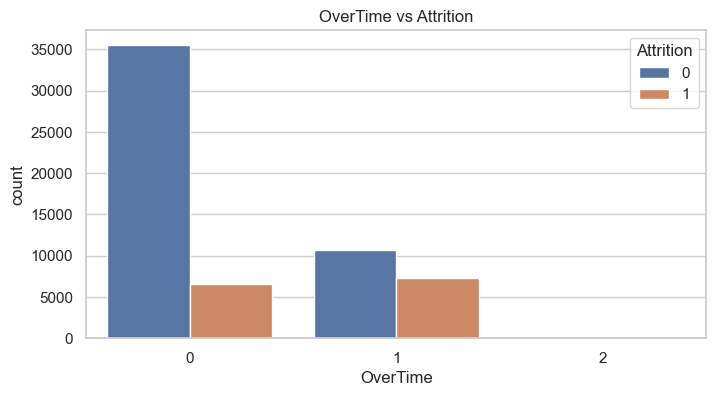

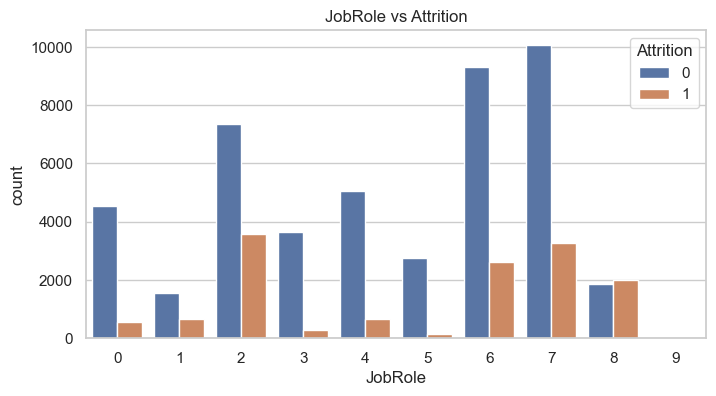

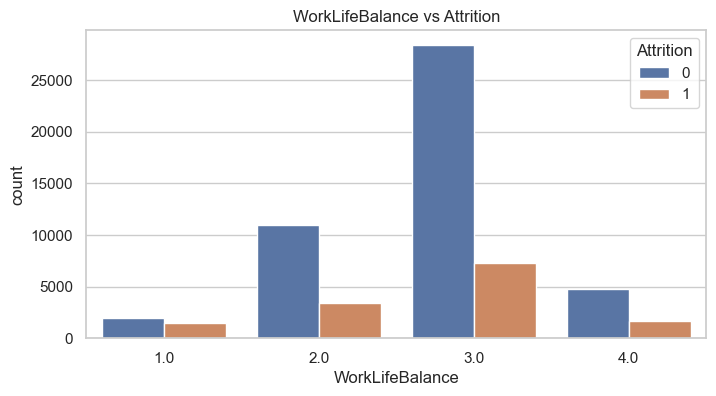

In [349]:
# Visualize Key Categorical Features vs Attrition
key_categorical = ['OverTime', 'JobRole', 'WorkLifeBalance']
for feature in key_categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Attrition', data=data)
    plt.title(f"{feature} vs Attrition")
    plt.xticks(rotation=0)
    plt.show()

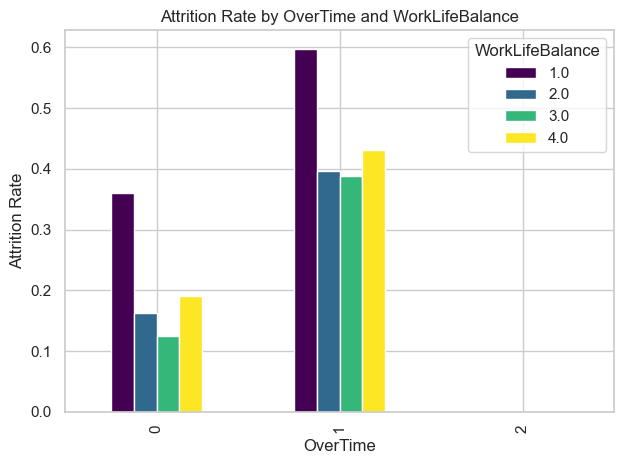

In [350]:
# Grouped Feature Analysis
grouped = data.groupby(['OverTime', 'WorkLifeBalance'])['Attrition'].mean().unstack()
grouped.plot(kind='bar', colormap='viridis')
plt.title("Attrition Rate by OverTime and WorkLifeBalance")
plt.ylabel("Attrition Rate")
plt.tight_layout()
plt.show()

In [352]:
# Preprocessing: Handle Missing Values, Outliers, Encoding, Scaling
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [353]:
# Missing Value Imputation
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numeric columns (always works)
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Impute categorical columns only if any exist
if len(cat_cols) > 0:
    data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])


In [355]:
# Check the Missing Values After Imputation 
if data.isnull().sum().sum() == 0:
    print("✅ No missing values in the dataset.")
else:
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.show()

✅ No missing values in the dataset.


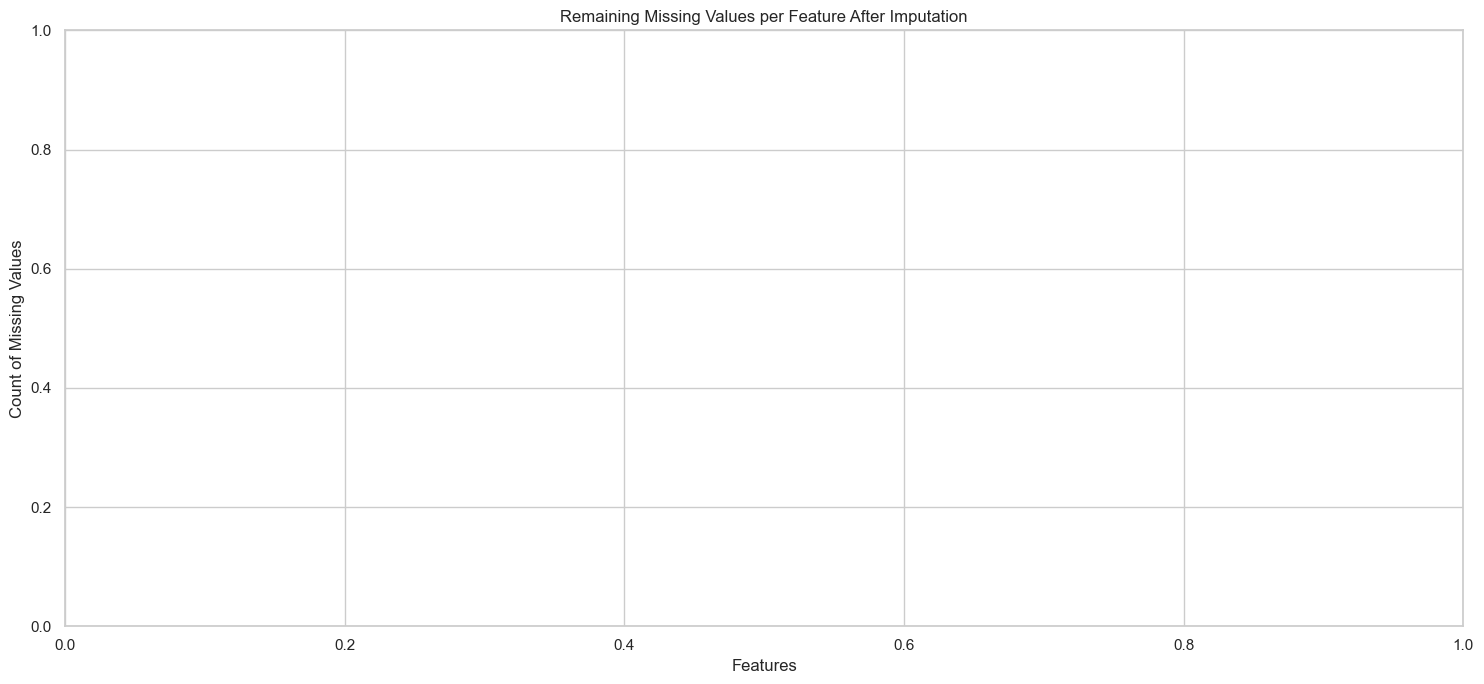

In [356]:
# Graph Results of Missing Values After Imputation
missing_after = data.isnull().sum()
missing_after = missing_after[missing_after > 0]
plt.figure(figsize=(15, 7))
sns.barplot(x=missing_after.index, y=missing_after.values, color='salmon')
plt.title("Remaining Missing Values per Feature After Imputation")
plt.ylabel("Count of Missing Values")
plt.xlabel("Features")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [358]:
print("Rows before outlier removal:", data.shape[0])

Rows before outlier removal: 60000


In [359]:
# Outlier Removal Function
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean  
# remove outliers on raw numeric columns
important_cols = ['MonthlyIncome', 'DistanceFromHome', 'Age','YearsSinceLastPromotion']
data = remove_outliers(data, important_cols)

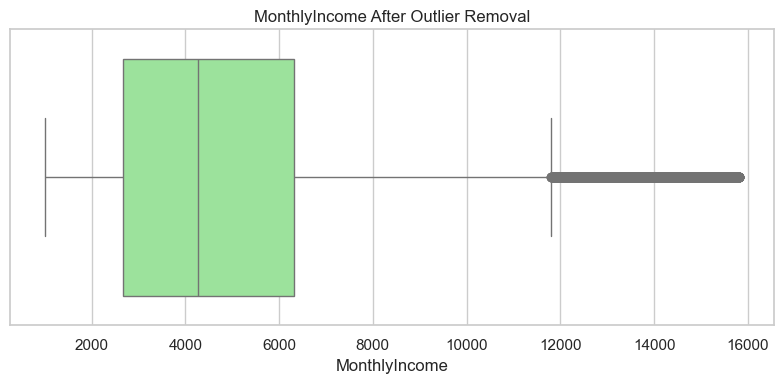

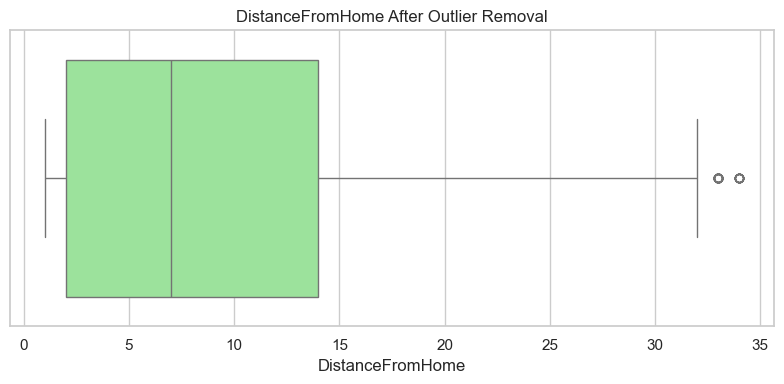

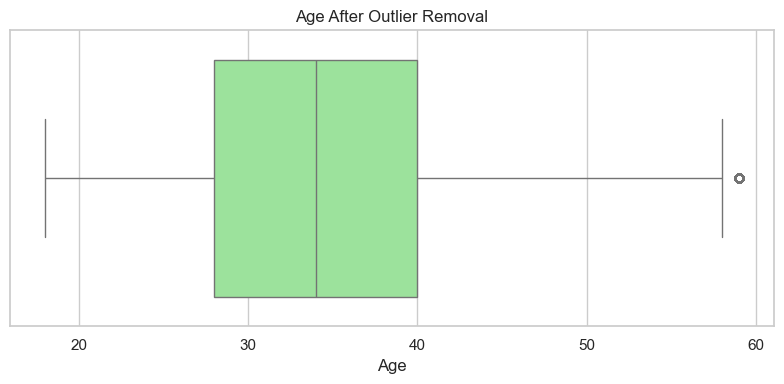

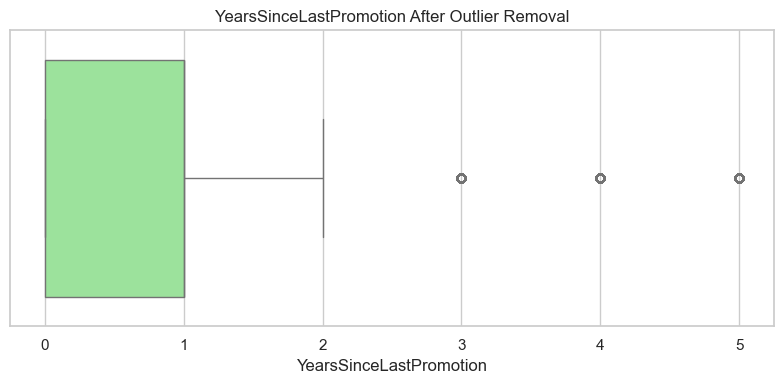

In [360]:
key_numeric = ['MonthlyIncome', 'DistanceFromHome', 'Age', 'YearsSinceLastPromotion']

for col in key_numeric:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f"{col} After Outlier Removal")
    plt.tight_layout()
    plt.show()

In [361]:
print("Rows after outlier removal :", data.shape[0])

Rows after outlier removal : 47375


In [362]:
# ✅ Smart drop of uninformative features (automated + manual protection)
def auto_drop_unrelated_columns(df, target_col='Attrition', corr_threshold=0.05):
    # Columns to always keep (even if correlation is low)
    always_keep = [
        'JobRole', 'BusinessTravel', 'EducationField', 'Gender',
        'Education', 'PerformanceRating', 'OverTime', 'NumCompaniesWorked','MonthlyRate'
    ]
    
    # Drop constant or ID-like columns
    drop_constant_or_id = [
        col for col in df.columns
        if df[col].nunique() <= 1 or df[col].nunique() == len(df)
    ]
    
    # Drop weakly correlated numeric columns
    if target_col in df.columns:
        numeric_corr = df.corr()[target_col].drop(target_col)
        weak_corr = numeric_corr[abs(numeric_corr) < corr_threshold].index.tolist()
    else:
        weak_corr = []
    
    # Combine and filter drops
    to_drop = list(set(drop_constant_or_id + weak_corr))
    filtered_drops = [col for col in to_drop if col not in always_keep]

    # Final drop
    print(f"✅ Actually dropping {len(filtered_drops)} columns: {filtered_drops}")
    df = df.drop(columns=filtered_drops, errors='ignore')
    return df

# 🟢 Apply the smart dropper
data = auto_drop_unrelated_columns(data, target_col='Attrition', corr_threshold=0.05)

✅ Actually dropping 7 columns: ['Over18', 'EmployeeNumber', 'EmployeeCount', 'PercentSalaryHike', 'StandardHours', 'DailyRate', 'HourlyRate']


In [364]:
# Prepare features and target
X_full = data.drop(columns='Attrition')
y_full = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)


In [365]:
# Logistic Regression BEFORE SMOTE
print("📊 Logistic Regression (Before SMOTE)")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

📊 Logistic Regression (Before SMOTE)
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7178
           1       0.76      0.52      0.62      2297

    accuracy                           0.84      9475
   macro avg       0.81      0.73      0.76      9475
weighted avg       0.84      0.84      0.83      9475



In [366]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"✅ After SMOTE: {X_resampled.shape[0]} rows (balanced classes)")
print(y_resampled.value_counts())

✅ After SMOTE: 57426 rows (balanced classes)
Attrition
1    28713
0    28713
Name: count, dtype: int64


In [367]:
# Logistic Regression AFTER SMOTE
print("📊 Logistic Regression (After SMOTE)")

X_resampled_scaled = scaler.fit_transform(X_resampled)  # use new StandardScaler if needed
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_resampled_scaled, y_resampled)
y_pred_smote = lr_smote.predict(X_test_scaled)

print(classification_report(y_test, y_pred_smote))


📊 Logistic Regression (After SMOTE)
              precision    recall  f1-score   support

           0       0.93      0.62      0.74      7178
           1       0.42      0.86      0.56      2297

    accuracy                           0.68      9475
   macro avg       0.68      0.74      0.65      9475
weighted avg       0.81      0.68      0.70      9475



In [368]:
# Hypothesis Sampling (before scaling)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_idx, sample_idx in split.split(data, data['Attrition']):
    data_main = data.iloc[train_idx]
    validation_sample = data.iloc[sample_idx]

# 📊 Compare shape
print(f"🟢 Full Dataset Rows     : {len(data)}")
print(f"🧪 Validation Sample Rows: {len(validation_sample)}")
print(f"📘 Training Set Rows     : {len(data_main)}")

# 📈 Compare statistics (mean, std)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
comparison_df = pd.DataFrame({
    "Full Mean": data[numeric_cols].mean(),
    "Sample Mean": validation_sample[numeric_cols].mean(),
    "Diff": (data[numeric_cols].mean() - validation_sample[numeric_cols].mean()).abs()
}).sort_values("Diff", ascending=False)

display(comparison_df.head(10))

# 🔢 Compare Attrition Distribution
print("\nAttrition Distribution (Full):")
print(data['Attrition'].value_counts(normalize=True).round(3))
print("\nAttrition Distribution (Sample):")
print(validation_sample['Attrition'].value_counts(normalize=True).round(3))

🟢 Full Dataset Rows     : 47375
🧪 Validation Sample Rows: 7107
📘 Training Set Rows     : 40268


,Full Mean,Sample Mean,Diff
MonthlyRate,14170.99,14279.60,108.61
MonthlyIncome,5048.23,5074.11,25.88
DistanceFromHome,9.40,9.54,0.14
Age,34.90,35.03,0.13
TotalWorkingYears,9.04,9.11,0.07
YearsWithCurrManager,3.29,3.23,0.06
YearsInCurrentRole,3.36,3.31,0.05
YearsAtCompany,5.37,5.34,0.03
NumCompaniesWorked,2.68,2.66,0.03
EnvironmentSatisfaction,2.68,2.70,0.02



Attrition Distribution (Full):
Attrition
0   0.76
1   0.24
Name: proportion, dtype: float64

Attrition Distribution (Sample):
Attrition
0   0.76
1   0.24
Name: proportion, dtype: float64


In [369]:
scaler = StandardScaler()
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

data[num_cols] = scaler.fit_transform(data[num_cols])
data_main.loc[:, num_cols] = scaler.transform(data_main[num_cols])
validation_sample.loc[:, num_cols] = scaler.transform(validation_sample[num_cols])

In [370]:
# View the first 10 rows of the standardized data
pd.set_option('display.float_format', '{:.2f}'.format)  
display(data[num_cols].head(10))

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.46,0.07,-0.85,-1.52,-1.00,-0.92,-1.54,-0.33,-0.17,0.13,-0.43,-1.58,-0.88,-0.48,-0.60,0.34,-0.30,-0.44,0.81,-0.41
2,0.24,-0.54,0.12,-0.62,1.80,0.33,-0.63,0.92,0.24,0.13,-0.43,-1.58,-0.88,0.47,0.17,-2.42,-0.51,-0.44,0.02,-0.41
3,-0.44,-1.03,2.08,0.28,1.80,1.58,-0.63,0.89,-0.55,-0.67,-0.43,-1.58,-0.88,0.31,-0.60,0.34,1.43,1.81,2.38,0.86
4,-1.46,-0.17,-1.83,1.19,-1.00,-0.92,0.27,-0.39,0.74,-0.67,-0.43,-1.58,-0.88,-0.64,-0.60,0.34,-0.08,-0.12,0.02,-0.41
7,-1.80,-0.05,0.12,1.19,-1.00,-0.92,0.27,-1.26,-0.71,-0.67,-0.43,-1.58,-0.88,-1.43,-0.60,0.34,-1.16,-1.08,-0.76,-1.04
8,-0.55,-1.03,0.12,-0.62,-1.00,-0.92,0.27,-0.77,1.84,1.32,-0.43,0.28,2.59,-0.64,0.17,0.34,-0.51,-0.44,-0.76,-0.41
9,-1.80,-0.05,-0.85,0.28,0.40,-0.92,-1.54,-0.81,-0.86,-0.67,2.35,0.28,-0.88,-1.27,0.94,0.34,-0.94,-0.76,-0.76,-1.04
12,1.03,-0.91,0.12,-1.52,-2.39,4.08,-0.63,3.42,-1.63,-0.27,-0.43,-1.58,-0.88,2.69,-0.60,0.34,3.80,2.13,0.02,3.07
13,-0.78,0.93,0.12,0.28,0.40,-0.92,0.27,-0.97,-1.72,-0.67,-0.43,0.28,-0.88,-0.64,0.17,-1.04,-0.08,-0.12,0.02,0.23
14,-0.10,-0.42,2.08,0.28,0.40,-0.92,0.27,-0.72,-0.27,0.13,2.35,-1.58,-0.88,-0.32,-0.60,0.34,-0.08,0.20,0.02,0.23


In [371]:
# Split Sample into Train/Test
X_sample = validation_sample.drop(columns='Attrition')
y_sample = validation_sample['Attrition']

X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

In [373]:
# Train and Evaluate Models on the Sample
models = {
    'Decision Tree': DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=3,
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=10,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=3,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=10,
        learning_rate=0.1,
        max_depth=3,
        min_samples_split=5,
        min_samples_leaf=3,
        random_state=42
    )
}


sample_results = {}

for name, model in models.items():
    model.fit(X_sample_train, y_sample_train)
    preds = model.predict(X_sample_test)

    acc = accuracy_score(y_sample_test, preds)
    prec = precision_score(y_sample_test, preds)
    rec = recall_score(y_sample_test, preds)
    f1 = f1_score(y_sample_test, preds)
    roc = roc_auc_score(y_sample_test, preds)

    sample_results[name] = [acc, prec, rec, f1, roc]

# Results Table
results_df = pd.DataFrame(sample_results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
print(results_df.T)


                   Accuracy  Precision  Recall  F1 Score  ROC AUC
Decision Tree          0.95       0.94    0.86      0.90     0.92
Random Forest          0.97       1.00    0.88      0.94     0.94
Gradient Boosting      0.80       0.97    0.17      0.29     0.58


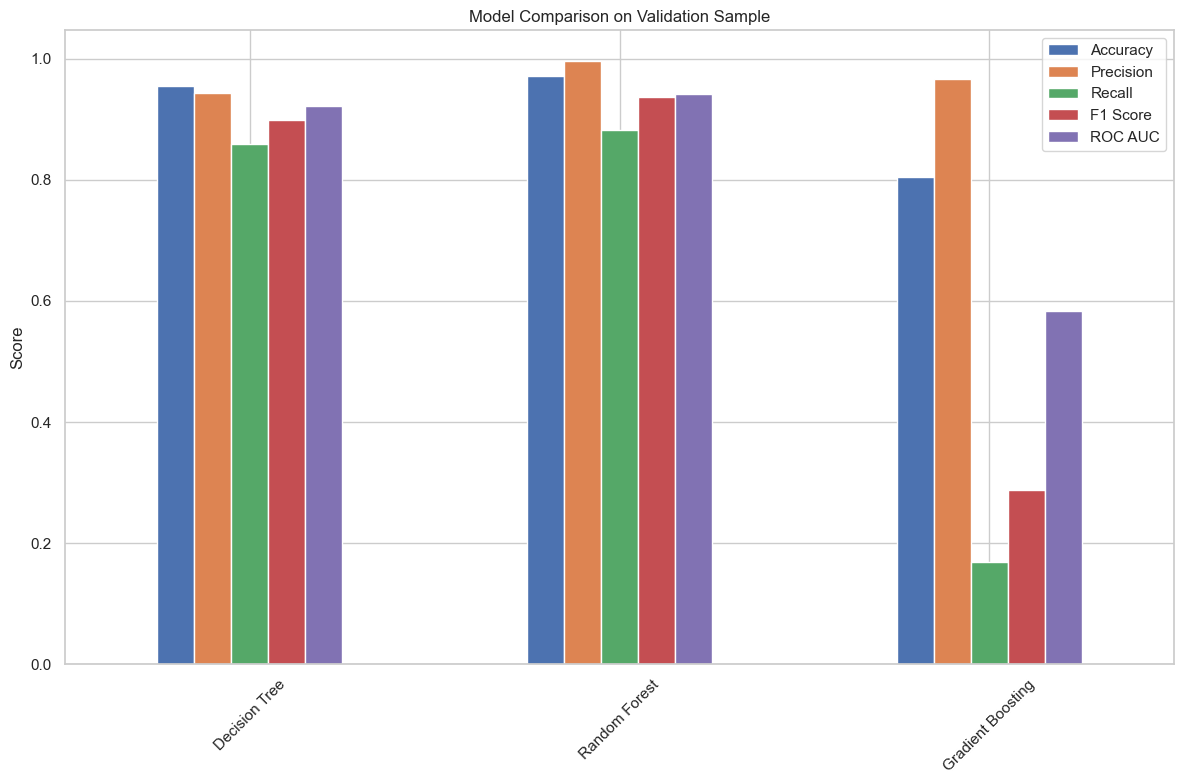

In [374]:
# Visualize Results
results_df.T.plot(kind='bar', figsize=(12, 8))
plt.title("Model Comparison on Validation Sample")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

📊 Evaluation on 80/20 Split of Full Scaled Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7171
           1       1.00      0.94      0.97      2304

    accuracy                           0.99      9475
   macro avg       0.99      0.97      0.98      9475
weighted avg       0.99      0.99      0.99      9475



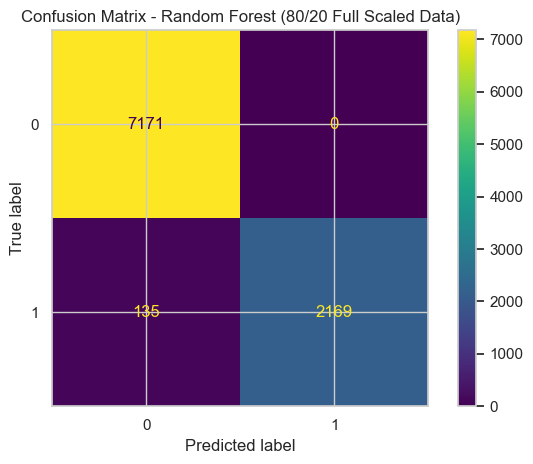

In [375]:
# Prepare full features and target
X_full = data.drop(columns='Attrition')
y_full = data['Attrition']

# Split into 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X_test)

print("📊 Evaluation on 80/20 Split of Full Scaled Data:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix - Random Forest (80/20 Full Scaled Data)")
plt.tight_layout()
plt.show()


In [376]:
#Retrain Best Model (Random Forest) on Full Dataset
final_model = RandomForestClassifier()
X_full = data.drop(columns='Attrition')
y_full = data['Attrition']
final_model.fit(X_full, y_full)

RandomForestClassifier()

In [377]:
# Save Final Model
with open('final_attrition_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

print("\\n✅ Final model saved as 'final_attrition_model.pkl'")

\n✅ Final model saved as 'final_attrition_model.pkl'


In [3]:
def predict_attrition_from_input(model, scaler, encoders, columns_order):
    print("🧾 Enter new employee details (same features as training)...")
    user_input = {}

    # 1. Input values from user
    for col in columns_order:
        if col == 'Attrition':
            continue
        val = input(f"{col}: ").strip()  # Clean user input
        user_input[col] = val

    # 2. Create DataFrame
    new_data = pd.DataFrame([user_input])

    # 3. Convert numeric values
    for col in new_data.columns:
        try:
            new_data[col] = pd.to_numeric(new_data[col])
        except:
            pass  # Keep categorical as string

    # 4. Apply encoders to categorical columns
    for col, le in encoders.items():
        if col in new_data.columns:
            try:
                # Optional: clean input for matching with encoder
                new_data[col] = new_data[col].astype(str).str.strip()
                new_data[col] = le.transform(new_data[col])
            except ValueError:
                print(f"⚠️ Invalid value for '{col}': '{new_data[col].values[0]}'.")
                print(f"   ➤ Valid options: {list(le.classes_)}")
                return

    # 5. Identify and scale numeric columns
    numeric_cols = [col for col in new_data.columns if new_data[col].dtype in ['float64', 'int64']]
    try:
        new_data[numeric_cols] = scaler.transform(new_data[numeric_cols])
    except Exception as e:
        print(f"❌ Scaling failed: {e}")
        return

    # 6. Reorder to match training input structure
    input_features = [col for col in columns_order if col != 'Attrition']
    missing_cols = [col for col in input_features if col not in new_data.columns]

    if missing_cols:
        print(f"❌ Missing required columns: {missing_cols}")
        return

    new_data = new_data.reindex(columns=input_features)

    # 7. Predict
    try:
        prediction = model.predict(new_data)[0]
        print("✅ Predicted Attrition:", "Yes" if prediction == 1 else "No")
    except Exception as e:
        print(f"❌ Prediction failed: {e}")



In [385]:
#columns_order = list(data.columns)  # includes all training columns
#predict_attrition_from_input(final_model, scaler, label_encoders, columns_order)

In [5]:
import random
import pandas as pd


def run_model(input_dict):
    df = pd.DataFrame([input_dict])
    
    
    df = df.fillna(0)
    encoded_df = pd.get_dummies(df)
    
    
    result = random.random()
    prediction = 1 if result > 0.5 else 0
    
    return 'Yes - Will Leave' if prediction == 1 else 'No - Will Stay'


In [6]:
sample_input = {
    "Age": 35,
    "BusinessTravel": "Travel_Rarely",
    "Department": "Research & Development",
    "DistanceFromHome": 3,
    "Education": 3,
    "EducationField": "Medical",
    "Gender": "Male",
    "JobRole": "Research Scientist",
    "MaritalStatus": "Single",
    "JobLevel": 2,
    "NumCompaniesWorked": 1,
    "TotalWorkingYears": 10,
    "TrainingTimesLastYear": 3,
    "YearsAtCompany": 5,
    "YearsInCurrentRole": 2,
    "YearsSinceLastPromotion": 1,
    "YearsWithCurrManager": 2
}

print(run_model(sample_input))


Yes - Will Leave
